<a href="https://colab.research.google.com/github/jackaquamin/myprojects/blob/main/TestCatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load the saved trained model
from tensorflow.keras.models import load_model
cnn = load_model('/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small/cats_and_dogs_small_1.h5')
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# upload the image (google)
from google.colab import files
file = files.upload()

Saving c.jpg to c.jpg


In [ ]:
# visualize the image
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('c.jpg', target_size=(150, 150))
img_tensor = image.img_to_array(img)

# prepare to input into network so we have batch size (1,150,150,3)
print (img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print (img_tensor.shape)
img_tensor /= 255

(150, 150, 3)
(1, 150, 150, 3)


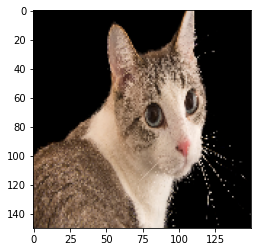

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
out = cnn.predict(img_tensor)
print(out)

[[4.3750882e-05]]


In [ ]:
# prediction out to class
pred_scores= cnn.predict(img_tensor)
if pred_scores > 0.5:
  pred_class = "Dog"
else:
  pred_class ="Cat"
print("Prediction class: ", pred_class)

Prediction class:  Cat


In [ ]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in cnn.layers[:8]] # extract the outputs of first 8 layers
activation_model = models.Model(inputs=cnn.input,outputs= layer_outputs) # create as a new model

(1, 36, 36, 64)


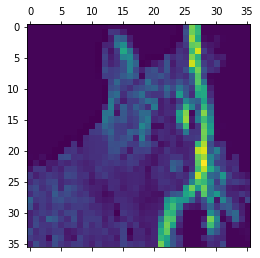

In [ ]:
activations = activation_model.predict(img_tensor) # do prediction
first_layer_activation = activations[3]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0,:,:,7])